In [17]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [3]:
# 데이터 불러오기
wine = pd.read_csv("./data/08_wine.csv")
wine

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0
...,...,...,...,...
6492,11.2,1.6,3.27,1.0
6493,9.6,8.0,3.15,1.0
6494,9.4,1.2,2.99,1.0
6495,12.8,1.1,3.34,1.0


In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [ ]:
"""
- alcohol : 알콜도수
- sugar : 당도
- pH : 농도
- class : 와인종류(0 : 레드와인, 1 : 화이트와인) -> 이진분류
"""

In [5]:
# 상관관계 분석 : 표시된 값들을 상관계수라 한다
# 상관계수는 -1 에서 1 사이 
# 음수 : 음의 상관관계(우하향)
# 양수 : 양의 상관관계(우상향)
# 상관계수 값이 1에 가까울수록 관계가 깊다
# 종속변수의 특성과 독립변수들간 관계를확인할 때 사용
# 초반에 종속변수에 영향을 많이 미칠것으로 예상되는 특성들을 확인 할 수 있음
# 확인방법 : 왼쪽 위에서 오른쪽 아래로 중앙 대각선을 기준으로 왼편 또는 오른편 확인
# 데이터는 절대값으로 확인
wine.corr()

,alcohol,sugar,pH,class
alcohol,1.000000,-0.359415,0.121248,0.032970
sugar,-0.359415,1.000000,-0.267320,0.348821
pH,0.121248,-0.267320,1.000000,-0.329129
class,0.032970,0.348821,-0.329129,1.000000


In [7]:
# 데이터 전처리
# 훈련데이터(input, target) 생성
# 변수 : fish_input, fish_target
wine_input = wine[["alcohol","sugar","pH"]].to_numpy() # 2차원
wine_target = wine["class"].to_numpy() # 1차원
print(wine_input.shape,wine_target.shape)

(6497, 3) (6497,)


In [10]:
# 훈련데이터와 테스트데이터로 분리
# 데이터 셋 분류
train_input, test_input, train_target, test_target = train_test_split(wine_input,wine_target,
                                                                      test_size=0.2,random_state=42)
print(train_input.shape,train_target.shape)
print(test_input.shape,test_target.shape)

(5197, 3) (5197,)
(1300, 3) (1300,)


In [11]:
# 정규화(표준화) 처리 : 다양한 단위의 범위를 일괄적인 범위로 맞추기 위해 standard 사용
# train_scaled, test_scaled
# 객체생성
ss = StandardScaler()
# 훈련시키기 - 정규화 데이터 생성
ss.fit(train_input)
# 생성된 정규화 데이터로 변환
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

print(train_scaled.shape,test_scaled.shape)

(5197, 3) (1300, 3)


In [13]:
# 훈련
# 로지스틱회귀 모델
lr = LogisticRegression()
lr.fit(train_scaled,train_target)
print(lr.score(train_scaled,train_target))
print(lr.score(test_scaled,test_target))

0.7808350971714451
0.7776923076923077


In [ ]:
# 결정트리(Decision Tree, DT)모델 사용
"""
- 질문(조건)을 스스로 만들어 가면서 트리 2개씩으로 가지를 치면서 분류한다고해서 트리임
- 질문을 스스로 찾아서 계속해서 질문(조건)을 만들어 나가는 분류모델
- 더 이상 질문이 없으면 결정(Decision)한다고 해 결정트리라고 함
- 분류 정확도가 높으며, 전체 트리 절차를 시각화 할 수 있는 장점이 있음
- 시각화 함수 : 사이킷런의 plot_tree() 함수 사용
"""

In [16]:
# 모델생성
dt = DecisionTreeClassifier(random_state=42)
# 훈련
dt.fit(train_scaled,train_target)
# 검증
print(dt.score(train_scaled,train_target))
print(dt.score(test_scaled,test_target))

# 과대적합 발생 의심

0.996921300750433
0.8592307692307692


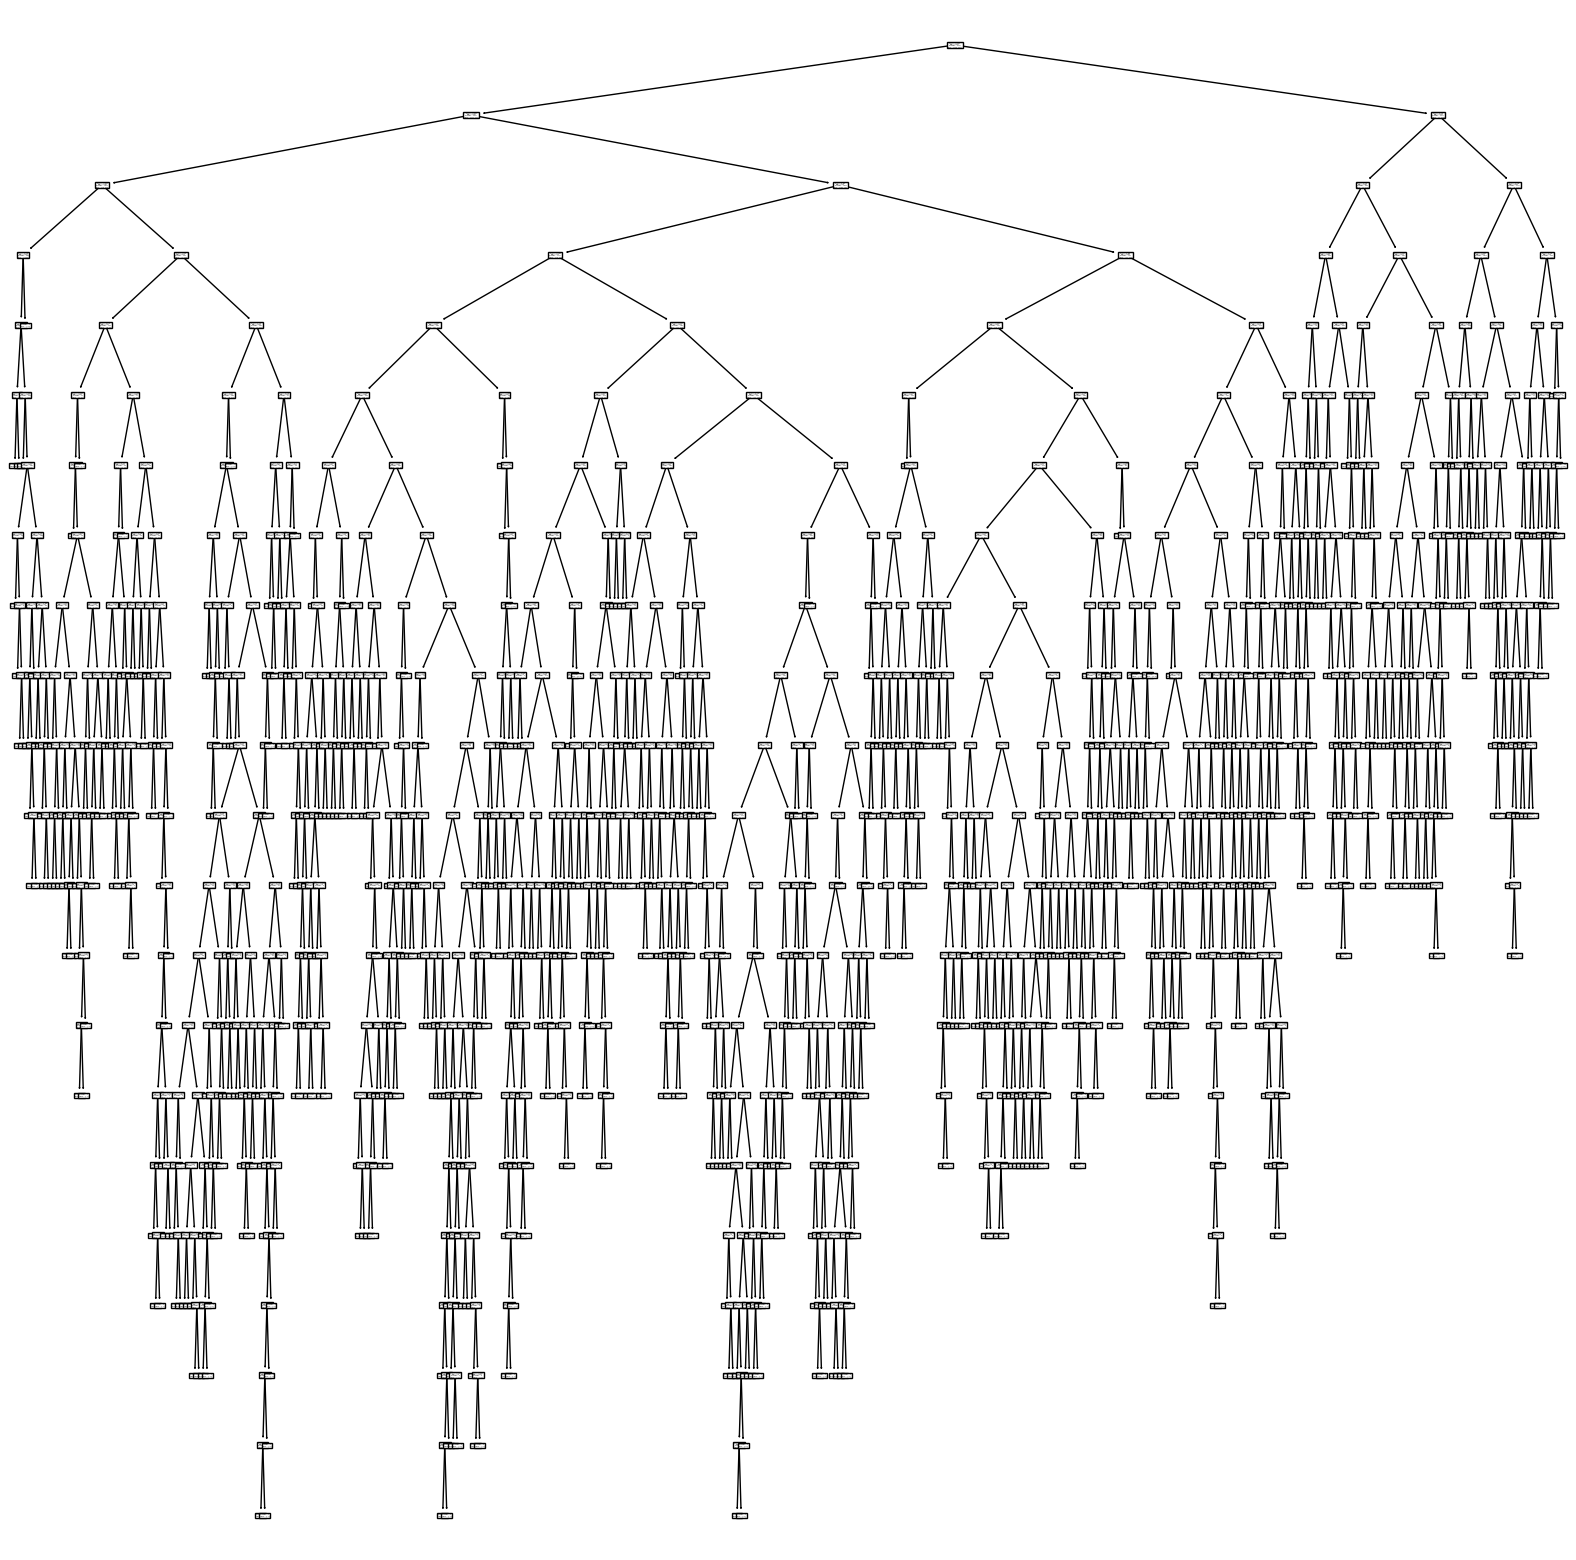

In [18]:
# 훈련 모델이 학습한 절차 시각화
plt.figure(figsize=(20,20))
plot_tree(dt)
plt.show()

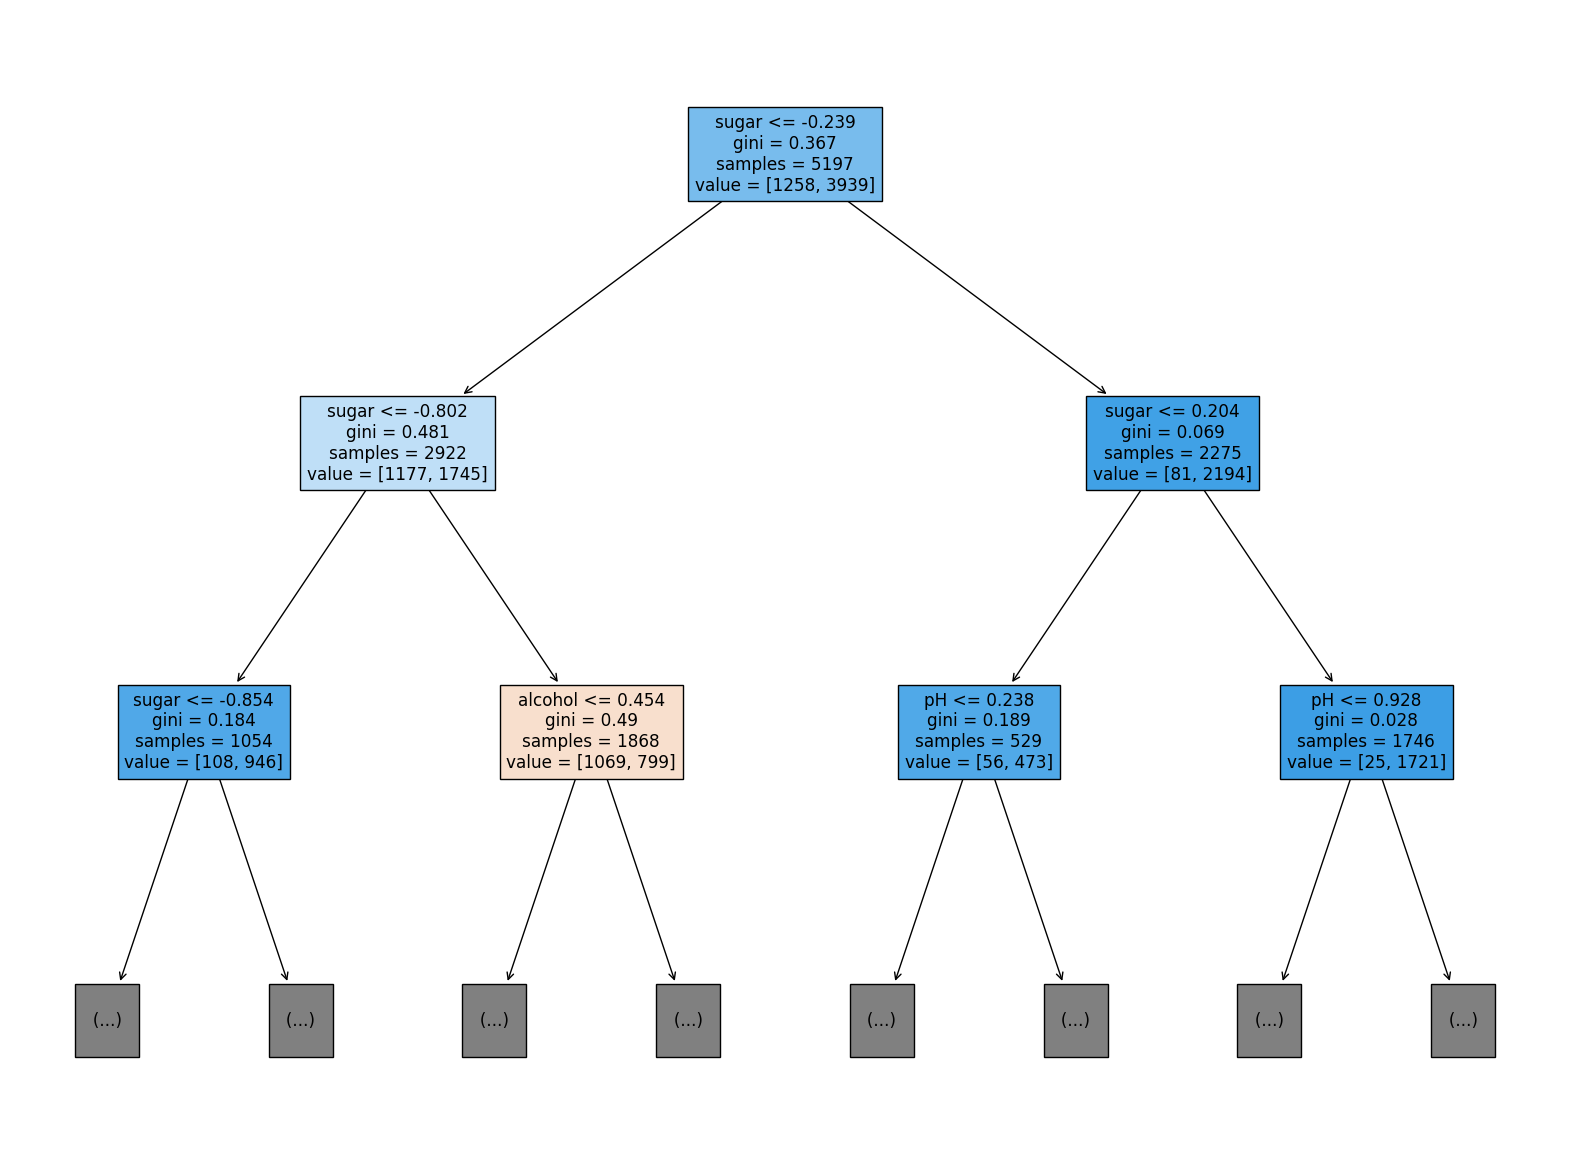

In [19]:
# 상위 트리만 확인해 보기
# max_depth : 트리의 깊이 지정 / 루트(root-가장 상단) 노드를 제외하고의 깊이 의미
# filled : 트리가 구분되면서 범주(feature_names)별 색으로 구분
plt.figure(figsize=(20,15))
plot_tree(dt,max_depth=2,filled=True,feature_names=["alcohol","sugar","pH"])
plt.show()
"""
- 트리의 첫번째 값 : 조건
- gini : 불순도(0에 가까울수록 정확도가 높아진다) / 불순도가 최대한 낮아질때까지 뻗어나감
- samples : 테스트에 사용된 총 데이터 개수
- value : 범주(특성)별 테스트에 사용된 데이터 개수

- 가장 위에있는 노드 : root 노드
- 가장 하단에 있는 노드 : leaf 노드
"""

In [20]:
# 가지치기 : 트리의 깊이(개수 : max_depth) 제한
# 모델생성
dt = DecisionTreeClassifier(random_state=42,max_depth=3)
# 훈련
dt.fit(train_scaled,train_target)
# 검증
print(dt.score(train_scaled,train_target))
print(dt.score(test_scaled,test_target))

0.8454877814123533
0.8415384615384616


In [22]:
# 특성 중요도
"""
- 어떤 특성(feature)이 가장 유용한지 확인
"""
print(dt.feature_importances_)

# 독립변수 3개 출력
# 결과 순서 : alcohol, sugar, pH

[0.12345626 0.86862934 0.0079144 ]


In [23]:
# 특성공학 : 특성을 줄여서 정확도 확인 / 중요도 낮은 pH를 빼고 실행
# 데이터 전처리
# 훈련데이터(input, target) 생성
# 변수 : fish_input, fish_target
wine_input = wine[["alcohol","sugar"]].to_numpy() # 2차원
wine_target = wine["class"].to_numpy() # 1차원
print(wine_input.shape,wine_target.shape)

(6497, 2) (6497,)


In [24]:
# 훈련데이터와 테스트데이터로 분리
# 데이터 셋 분류
train_input, test_input, train_target, test_target = train_test_split(wine_input,wine_target,
                                                                      test_size=0.25,random_state=42)
print(train_input.shape,train_target.shape)
print(test_input.shape,test_target.shape)

(4872, 2) (4872,)
(1625, 2) (1625,)


In [25]:
# 정규화(표준화) 처리 : 다양한 단위의 범위를 일괄적인 범위로 맞추기 위해 standard 사용
# train_scaled, test_scaled
# 객체생성
ss = StandardScaler()
# 훈련시키기 - 정규화 데이터 생성
ss.fit(train_input)
# 생성된 정규화 데이터로 변환
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

print(train_scaled.shape,test_scaled.shape)

(4872, 2) (1625, 2)


In [26]:
# 가지치기 : 트리의 깊이(개수 : max_depth) 제한
# 모델생성
dt = DecisionTreeClassifier(random_state=42,max_depth=3)
# 훈련
dt.fit(train_scaled,train_target)
# 검증
print(dt.score(train_scaled,train_target))
print(dt.score(test_scaled,test_target))

0.8499589490968801
0.8363076923076923


In [ ]:
# 트리여러개 모아서 